# 미분양 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
unsold_house_df = pd.read_excel('../data/added_features/미분양 현황.xlsx')

In [5]:
unsold_house_df.drop(['구분'], axis=1, inplace=True)
unsold_house_df

,'07.01,'07.02,'07.03,'07.04,'07.05,'07.06,'07.07,'07.08,'07.09,'07.10,...,'23.08,'23.09,'23.10,'23.11,'23.12,'24.01,'24.02,'24.03,'24.04,'24.05
0,697,590.00,687.00,685.00,704.00,778.00,840.00,730.0,724.00,977.00,...,976.00,914.00,908.00,877.00,958.00,997.00,1018.00,968.00,936.00,974.00
1,-,-15.35,16.44,-0.29,2.77,10.51,7.97,-13.1,-0.82,34.94,...,-9.71,-6.35,-0.66,-3.41,9.24,4.07,2.11,-4.91,-3.31,4.06


In [7]:
cols = unsold_house_df.columns
cols

Index([''07.01', ''07.02', ''07.03', ''07.04', ''07.05', ''07.06', ''07.07',
       ''07.08', ''07.09', ''07.10',
       ...
       ''23.08', ''23.09', ''23.10', ''23.11', ''23.12', ''24.01', ''24.02',
       ''24.03', ''24.04', ''24.05'],
      dtype='object', length=209)

In [8]:
cols = [col.replace('\'', '') for col in cols]
cols = [int('20'+col.replace('.', '')) for col in cols]
cols

[200701,
 200702,
 200703,
 200704,
 200705,
 200706,
 200707,
 200708,
 200709,
 200710,
 200711,
 200712,
 200801,
 200802,
 200803,
 200804,
 200805,
 200806,
 200807,
 200808,
 200809,
 200810,
 200811,
 200812,
 200901,
 200902,
 200903,
 200904,
 200905,
 200906,
 200907,
 200908,
 200909,
 200910,
 200911,
 200912,
 201001,
 201002,
 201003,
 201004,
 201005,
 201006,
 201007,
 201008,
 201009,
 201010,
 201011,
 201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112,
 201201,
 201202,
 201203,
 201204,
 201205,
 201206,
 201207,
 201208,
 201209,
 201210,
 201211,
 201212,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 201311,
 201312,
 201401,
 201402,
 201403,
 201404,
 201405,
 201406,
 201407,
 201408,
 201409,
 201410,
 201411,
 201412,
 201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 

In [9]:
unsold_house_df.columns = cols
unsold_house_df

,200701,200702,200703,200704,200705,200706,200707,200708,200709,200710,...,202308,202309,202310,202311,202312,202401,202402,202403,202404,202405
0,697,590.00,687.00,685.00,704.00,778.00,840.00,730.0,724.00,977.00,...,976.00,914.00,908.00,877.00,958.00,997.00,1018.00,968.00,936.00,974.00
1,-,-15.35,16.44,-0.29,2.77,10.51,7.97,-13.1,-0.82,34.94,...,-9.71,-6.35,-0.66,-3.41,9.24,4.07,2.11,-4.91,-3.31,4.06


In [10]:
unsold_house_df = pd.DataFrame(unsold_house_df.iloc[0])
unsold_house_df.reset_index(inplace=True)
unsold_house_df.columns = ['년도월', '미분양']
unsold_house_df

,년도월,미분양
0,200701,697
1,200702,590.0
2,200703,687.0
3,200704,685.0
4,200705,704.0
...,...,...
204,202401,997.0
205,202402,1018.0
206,202403,968.0
207,202404,936.0


# 시각화

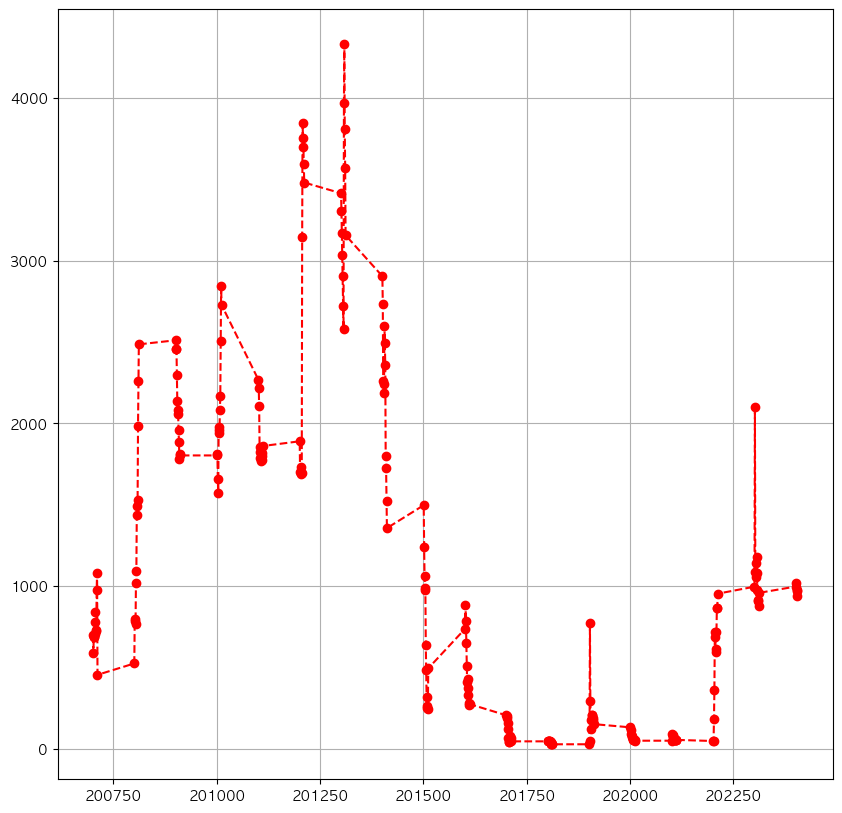

In [13]:
plt.figure(figsize=(10, 10))
plt.plot(unsold_house_df['년도월'], unsold_house_df['미분양'], marker='o', linestyle='--', color='r')
plt.grid(True)
plt.show()

# 원본에 적용

In [14]:
df = pd.read_csv('../data/preprocessed/8_construction_consent.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_37297/3952777269.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/8_construction_consent.csv')


In [15]:
unsold_house_mapping = pd.Series({ym:value for ym, value in zip(unsold_house_df['년도월'], unsold_house_df['미분양'])})

df['미분양'] = np.nan
df['미분양'] = df['미분양'].fillna(df['계약년월'].map(unsold_house_mapping))

In [17]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,가장 가까운 버스 정류장 Y좌표,인근 버스 정류장 개수,계약년,계약월,GDP,한국은행 기준금리,기대 인플레이션,지가지수,아파트 인허가,미분양
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794,74984.0,45.0
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794,74984.0,45.0
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794,74984.0,45.0
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,37.476564,7.0,2018,1,1725373.4,1.5,2.6,78.143,32848.0,45.0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,37.476564,7.0,2018,1,1725373.4,1.5,2.6,78.143,32848.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,37.619326,7.0,2023,7,1712792.9,3.5,3.3,98.993,34043.0,1081.0
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,37.619326,7.0,2023,7,1712792.9,3.5,3.3,98.993,34043.0,1081.0
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,37.619326,7.0,2023,8,1712792.9,3.5,3.3,99.133,34043.0,976.0
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,37.619326,7.0,2023,9,1712792.9,3.5,3.3,99.324,34043.0,914.0


In [26]:
df.to_csv('../data/preprocessed/9_unsold_house.csv', index=False)